In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


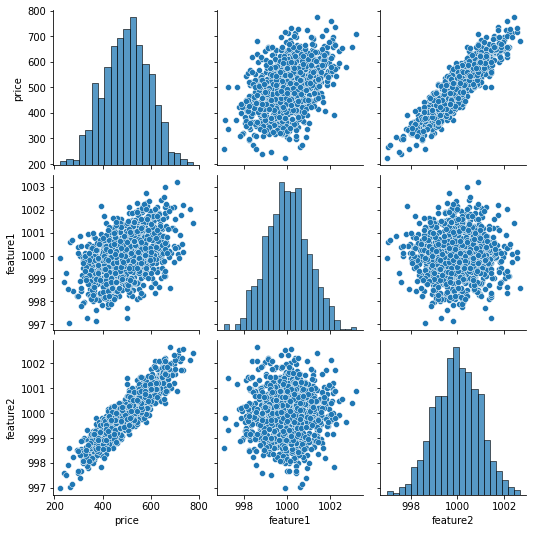

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1', 'feature2']].values

In [8]:
y = df['price'].values

In [9]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [10]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)          # calculating STD

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)

In [18]:

X_test = scaler.transform(X_test)

In [19]:
X_train.min()

0.0

In [20]:
# Creating and Training the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
#help(Sequential)
#help(Dense)

In [24]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [25]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256652.5312
Epoch 2/250
22/22 [==============================] - 0s 981us/step - loss: 256488.0469
Epoch 3/250
22/22 [==============================] - 0s 913us/step - loss: 256323.6406
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256137.6875
Epoch 5/250
22/22 [==============================] - 0s 980us/step - loss: 255920.6875
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255667.1562
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255374.0625
Epoch 8/250
22/22 [==============================] - 0s 932us/step - loss: 255036.9375
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254654.7500
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254219.9062
Epoch 11/250
22/22 [==============================] - 0s 986us/step - loss: 253734.0625
Epoch 12/250
22/22 [==============================] -

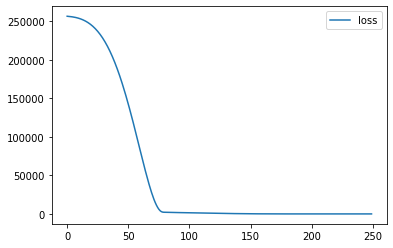

In [26]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [27]:
# Model Evaluation

In [29]:
model.evaluate(X_test, y_test, verbose=0)

27.565126419067383

In [30]:
model.evaluate(X_train, y_train, verbose=0)

27.930646896362305

In [31]:
test_predictions = model.predict(X_test)

In [32]:
test_predictions

array([[403.8056 ],
       [621.52405],
       [590.1787 ],
       [570.36743],
       [365.28754],
       [577.2809 ],
       [513.36053],
       [457.46863],
       [547.44135],
       [445.90424],
       [609.7974 ],
       [547.0516 ],
       [417.58685],
       [407.3912 ],
       [649.0956 ],
       [435.7202 ],
       [506.66675],
       [657.87964],
       [660.4954 ],
       [563.6391 ],
       [332.94794],
       [443.25732],
       [381.12097],
       [377.33292],
       [564.7228 ],
       [608.6403 ],
       [530.60645],
       [426.31564],
       [653.3873 ],
       [412.55237],
       [441.03793],
       [483.44946],
       [436.84528],
       [679.71875],
       [423.1868 ],
       [416.1979 ],
       [500.14328],
       [548.6331 ],
       [508.04236],
       [393.9553 ],
       [616.5747 ],
       [415.09918],
       [602.46954],
       [444.334  ],
       [500.27106],
       [579.7364 ],
       [666.8264 ],
       [488.68817],
       [317.27866],
       [483.75424],


In [33]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [34]:
pred_df = pd.DataFrame(y_test, columns = ['Test True Y'])
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [35]:
pred_df = pd.concat([pred_df, test_predictions], axis =1)

In [36]:
pred_df

,Test True Y,0
0,402.296319,403.805603
1,624.156198,621.524048
2,582.455066,590.178711
3,578.588606,570.367432
4,371.224104,365.287537
...,...,...
295,525.704657,527.286682
296,502.909473,513.678772
297,612.727910,607.662964
298,417.569725,415.413879


In [37]:
pred_df.columns = ['Test True Y', 'Model Predictions']


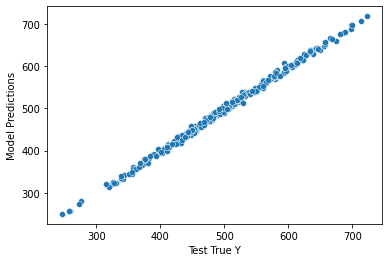

In [38]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.228469574737463

In [41]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [42]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.250251093553918

In [43]:
new_gem = [[998, 1000]]

In [44]:
new_gem = scaler.transform(new_gem)

In [45]:
model.predict(new_gem)

array([[418.22406]], dtype=float32)

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save('my_gem_model.h5')

In [48]:
later_model = load_model('my_gem_model.h5')

In [49]:
later_model.predict(new_gem)

array([[418.22406]], dtype=float32)